In [12]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Configuration for graphs width and layout of graphs
sns.set_style("darkgrid")

# Warnings remove warnings
import warnings
warnings.filterwarnings("ignore")


In [13]:
df = pd.read_csv("gender_classification.csv")
df.head(3)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male


In [14]:
def check(self): 
    print("\nShape:")
    print(self.shape)
    print("\nData Types:")
    print(self.info())
    print("\nCheck NaN:")
    print(self.isnull().sum())
    print("\nCheck NaN as Percentage:")
    print((self.isnull().sum()/len(self))*100)
    print("\nOverall NaN valu as Percentage:")
    print(self.isnull().sum().sum()/(self.shape[0]*self.shape[1])*100)
    print("\nCheck Duplicates:")
    print(self.duplicated().sum())

check(df)


Shape:
(5001, 8)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB
None

Check NaN:
long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gende

## Data Cleaning

In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [17]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

## LabelEncoder

In [19]:
le = LabelEncoder()
le.fit(df['gender'])

LabelEncoder()

In [20]:
df['gender'] = le.transform(df['gender'])
df.head(3)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1


# **Data Visualization**

## *Histplot*

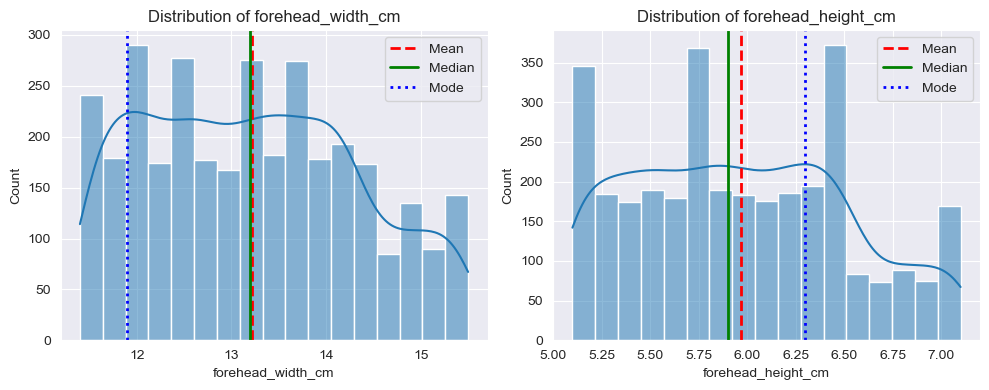

In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Number of charts per row
n_cols = 2

df2 = df[['forehead_width_cm', 'forehead_height_cm']].copy()

# Calculate required number of rows
n_rows = math.ceil(len(df2.columns) / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each column on its subplot
for i, col in enumerate(df2.columns):

    # Drop missing values
    data = df2[col].dropna()

    # Plot histogram
    sns.histplot(data, ax=axes[i], kde=True)

    # Calculate statistics
    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode()[0]   # first mode

    # Add vertical lines
    axes[i].axvline(mean_val, linestyle='--', linewidth=2, label='Mean', color='red')
    axes[i].axvline(median_val, linestyle='-', linewidth=2, label='Median', color='green')
    axes[i].axvline(mode_val, linestyle=':', linewidth=2, label='Mode', color='blue')

    # Titles & legend
    axes[i].set_title(f"Distribution of {col}")
    axes[i].legend()

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
# plt.savefig("Histplot.png")
plt.show()


## *Heatmap(Correlation)*

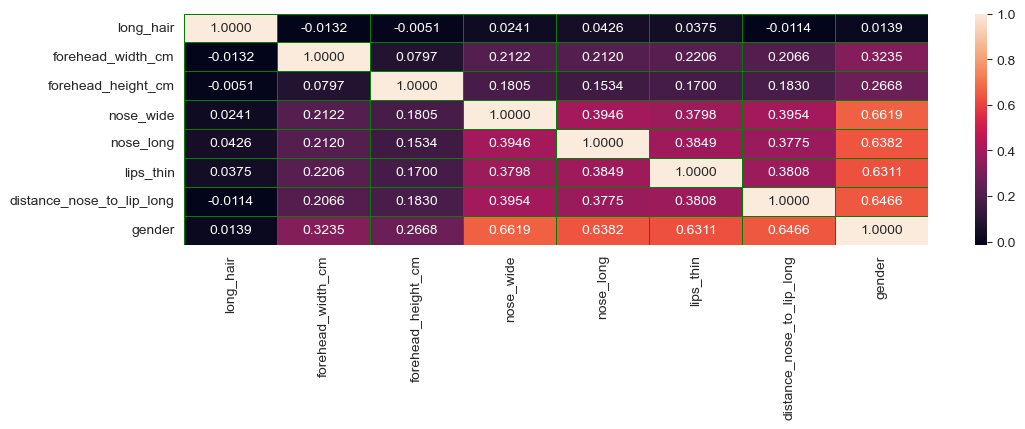

In [25]:
plt.subplots(figsize = (12,3))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, linecolor = "Green", fmt = ".4f")
# plt.savefig("Heatmap.png")
plt.show()

## *Pairplot*

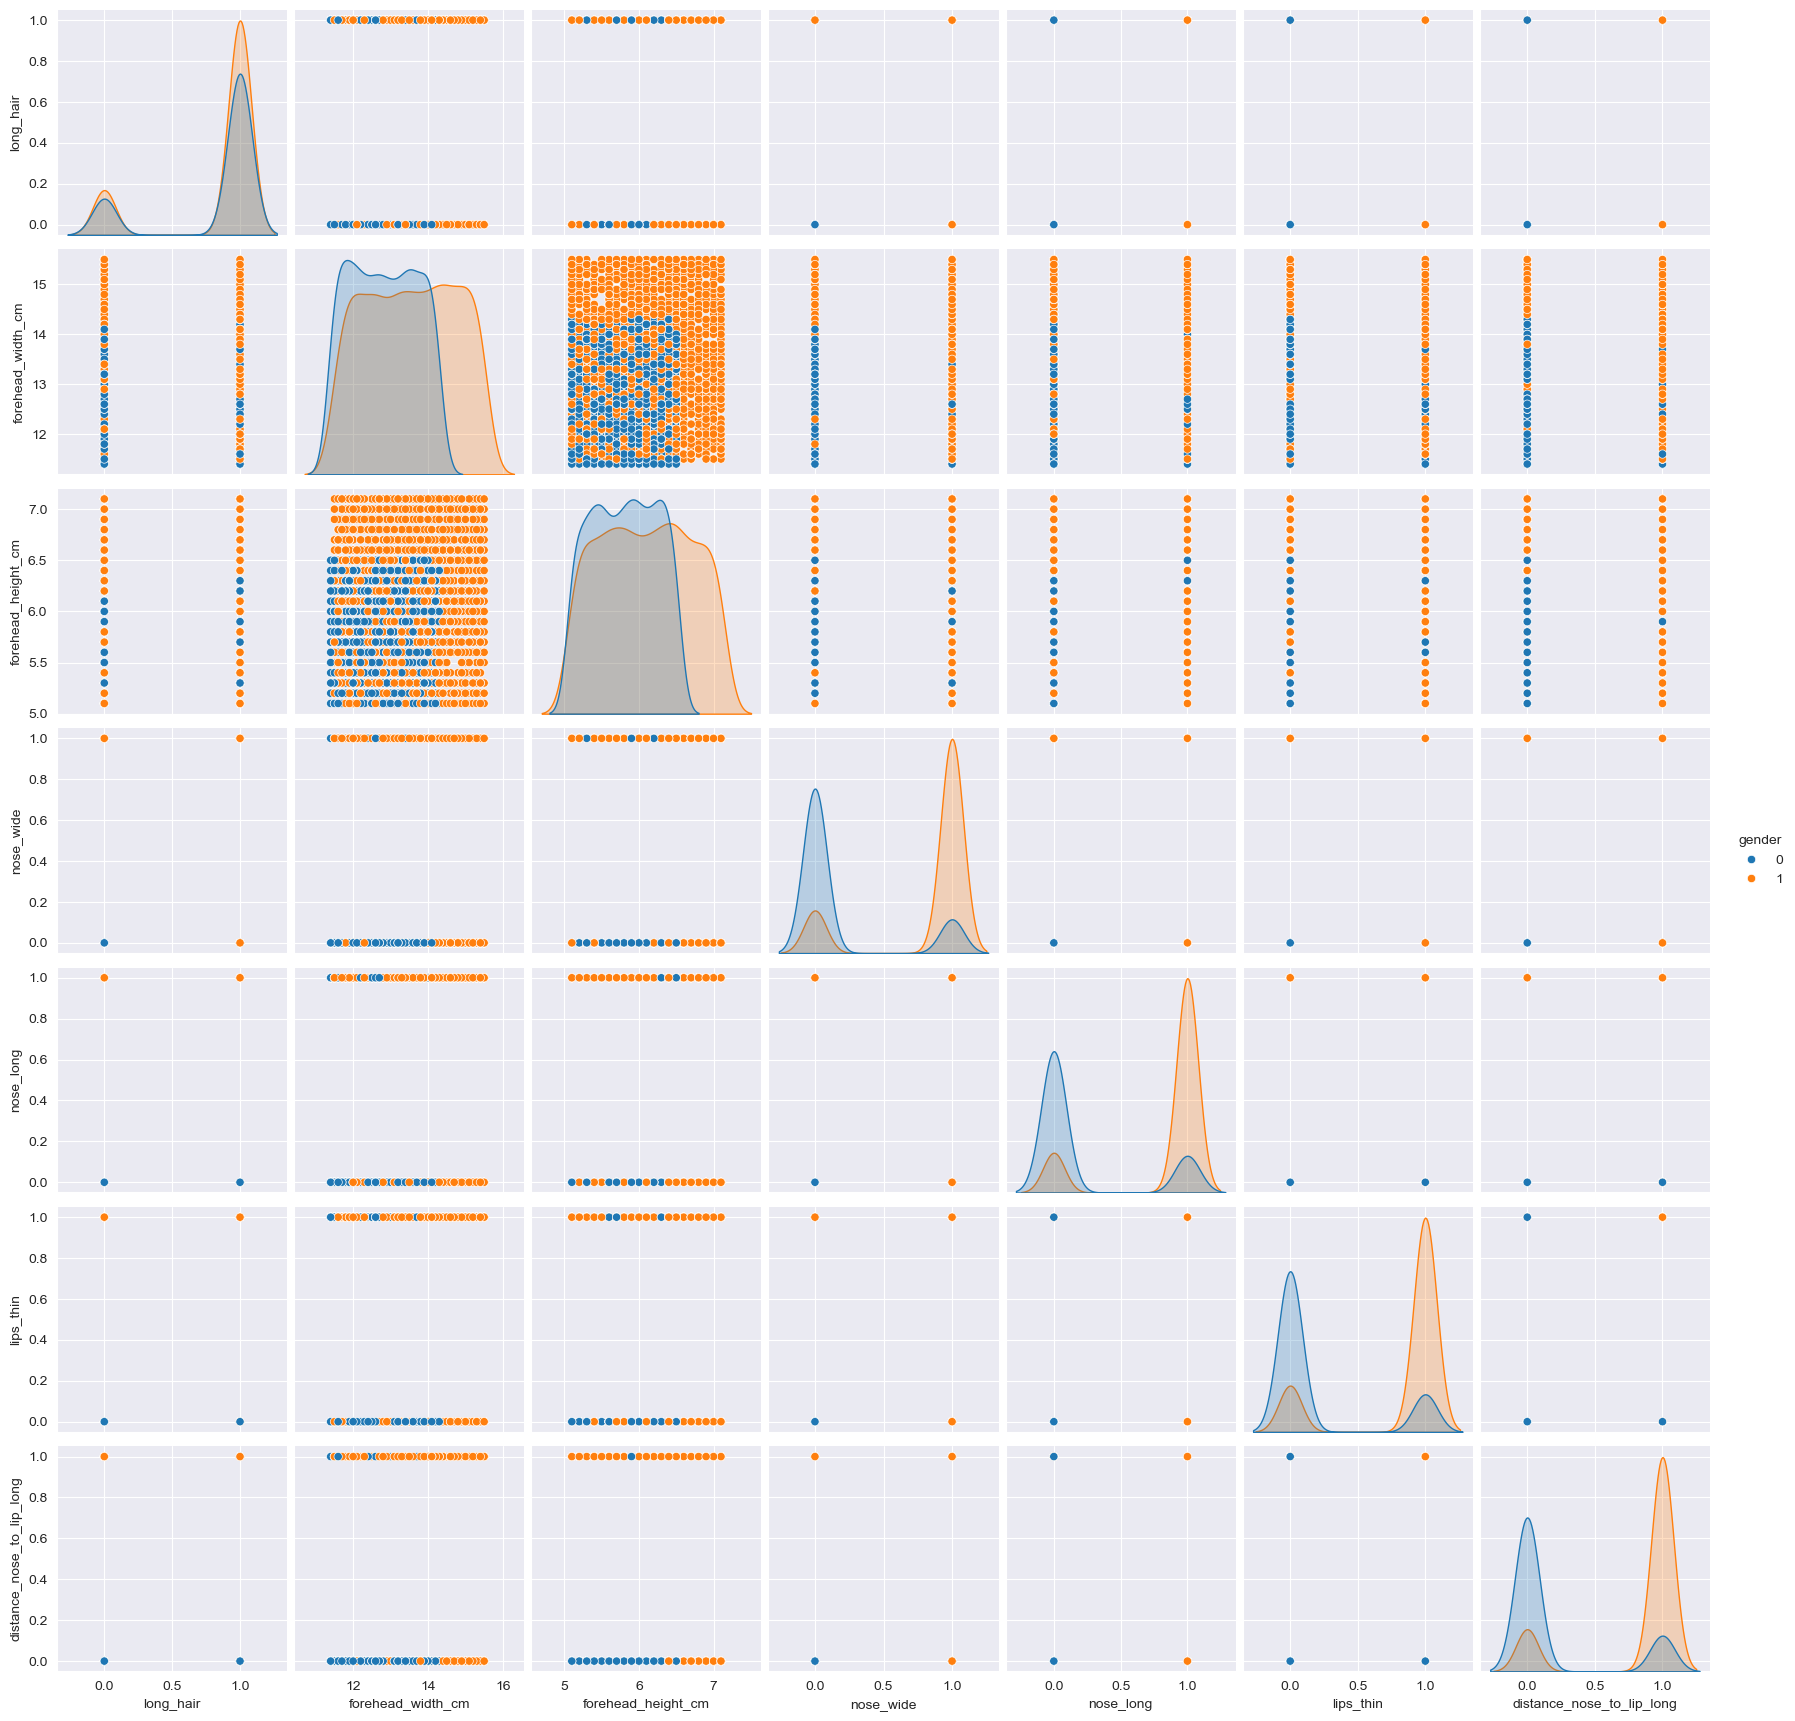

In [27]:
sns.pairplot(df, hue='gender')
# plt.savefig("Pairplot.png")
plt.show()

## *Scatterplot*

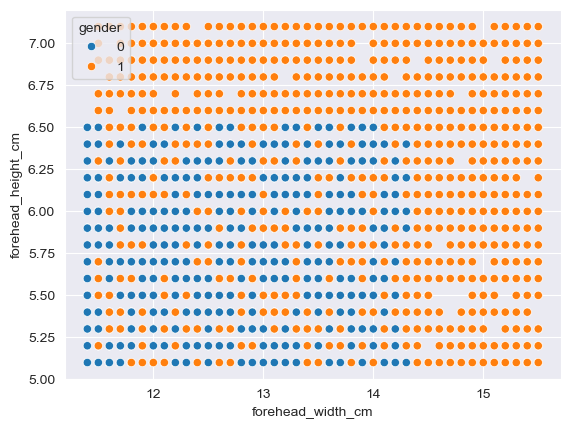

In [29]:
sns.scatterplot(x='forehead_width_cm', y='forehead_height_cm', data=df, hue='gender')
# plt.savefig("Scatterplot.png")
plt.show()


## *countplot(Gender)*

gender
1    1783
0    1450
Name: count, dtype: int64


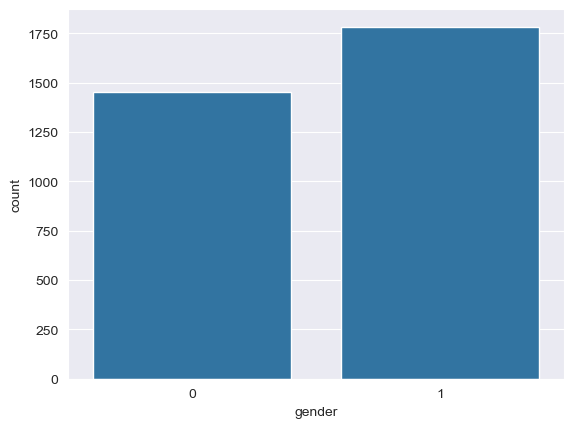

In [31]:
print(df['gender'].value_counts())
sns.countplot(x='gender', data=df) 
plt.show()

# **Best Model Selection**(*SAMPLERS+NAIVE BAYES MODELS*)

In [33]:
# 1. IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, Binarizer

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTETomek, SMOTEENN


# 2. FEATURES & TARGET
df2 = df.copy()
X = df2.iloc[:, :-1]
y = df2['gender']

# 3. TRAIN–TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# 4. SAMPLERS
samplers = {
    "No Sampling": None,
    "RandomOverSampler": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "RandomUnderSampler": RandomUnderSampler(random_state=42),
    "NearMiss": NearMiss(),
    "SMOTETomek": SMOTETomek(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42)
}


# 5. NAIVE BAYES MODELS
models = {
    "GaussianNB": Pipeline([
        ("model", GaussianNB())
    ]),

    "BernoulliNB": Pipeline([
        ("binarizer", Binarizer(threshold=0.5)),
        ("model", BernoulliNB())
    ]),

    "MultinomialNB": Pipeline([
        ("scaler", MinMaxScaler()),
        ("model", MultinomialNB())
    ])
}


# 6. TRAIN - TEST - COLLECT ACCURACY
results = []

for sampler_name, sampler in samplers.items():
    for model_name, model_pipe in models.items():

        steps = []

        if sampler is not None:
            steps.append(("sampler", sampler))

        for step in model_pipe.steps:
            steps.append(step)

        pipe = Pipeline(steps)

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        acc = accuracy_score(y_test, y_pred) * 100

        results.append({
            "Sampling Method": sampler_name,
            "Model": model_name,
            "Accuracy (%)": round(acc, 2)
        })


# 7. RESULTS TABLE (SORTED)
results_df = (
    pd.DataFrame(results)
    .sort_values(by="Accuracy (%)", ascending=False)
    .reset_index(drop=True)
)

print(results_df)


       Sampling Method          Model  Accuracy (%)
0          No Sampling     GaussianNB         95.83
1                SMOTE     GaussianNB         95.83
2           SMOTETomek     GaussianNB         95.83
3   RandomUnderSampler     GaussianNB         95.83
4    RandomOverSampler     GaussianNB         95.83
5             SMOTEENN     GaussianNB         95.36
6      BorderlineSMOTE     GaussianNB         95.21
7             NearMiss     GaussianNB         94.74
8    RandomOverSampler    BernoulliNB         93.66
9           SMOTETomek    BernoulliNB         93.66
10               SMOTE    BernoulliNB         93.66
11            SMOTEENN    BernoulliNB         93.66
12     BorderlineSMOTE    BernoulliNB         93.66
13  RandomUnderSampler    BernoulliNB         93.66
14         No Sampling    BernoulliNB         92.58
15            NearMiss    BernoulliNB         92.27
16     BorderlineSMOTE  MultinomialNB         88.25
17            NearMiss  MultinomialNB         87.48
18   RandomO

## Train Test Split

In [35]:
x = df.iloc[:,:-1]
y = df['gender']

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Balance Data ( Smote )

In [37]:
smote.fit(x_train, y_train)

SMOTE(random_state=42)

In [38]:
x_smote, y_smote = smote.fit_resample(x_train, y_train)
print("Successfully Completed!")

Successfully Completed!


In [39]:
x_smote.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,14.1,5.8,1,0,1,1
1,1,14.8,5.7,1,1,1,1
2,1,12.7,5.9,0,0,0,0
3,1,13.9,6.3,0,0,1,0
4,1,12.1,5.1,0,0,0,0


In [40]:
x_smote.count()

long_hair                    2852
forehead_width_cm            2852
forehead_height_cm           2852
nose_wide                    2852
nose_long                    2852
lips_thin                    2852
distance_nose_to_lip_long    2852
dtype: int64

In [41]:
y_smote.count()

2852

In [42]:
y_smote.value_counts()

gender
1    1426
0    1426
Name: count, dtype: int64

## Naive Bayes(GaussianNB)

In [44]:
gnb.fit(x_smote,y_smote)

GaussianNB()

In [45]:
round(gnb.score(x_test,y_test),5)*100

95.827

### usinig pipeline

In [47]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', GaussianNB())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
round(pipeline.score(x_test,y_test),5)*100
# y_pred

95.827

In [48]:
# pipeline.predict(x[[]])

## **Best Model Selection**


Best Model: AdaBoost
Accuracy     96.45
Precision    97.18
Recall       96.36
F1 Score     96.77
Name: AdaBoost, dtype: float64


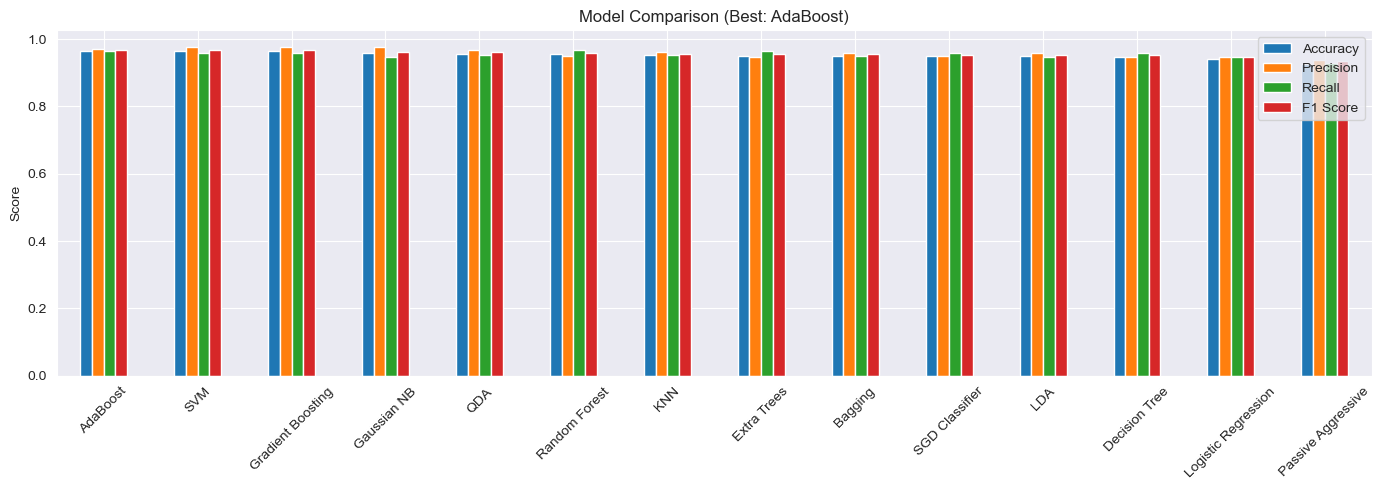

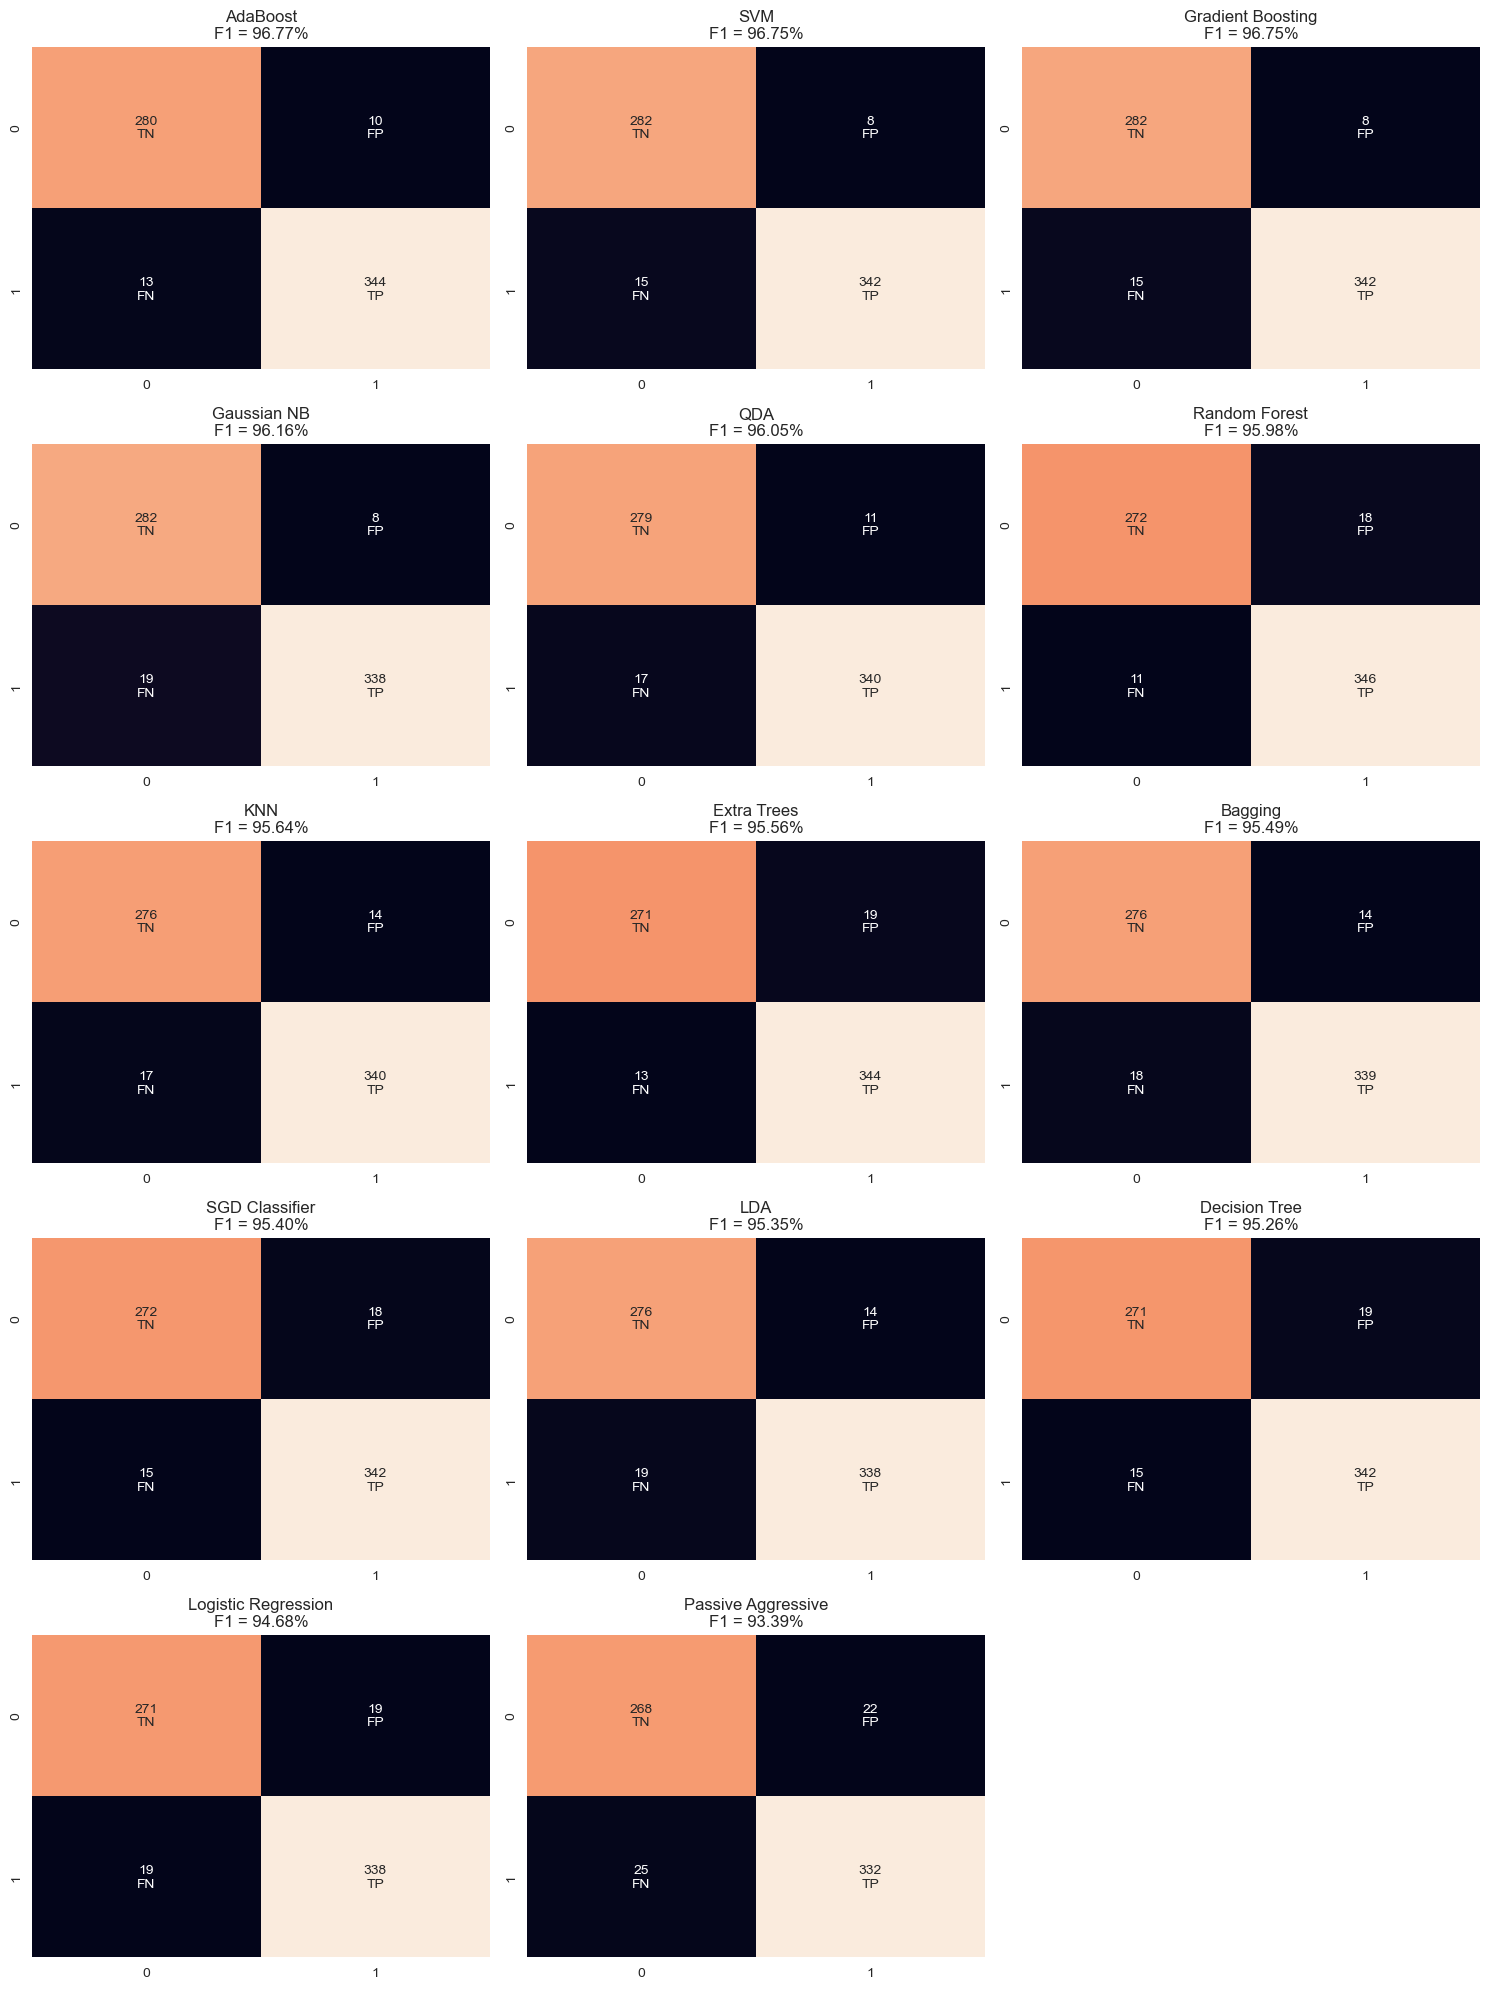


Model Performance Summary (F1 Score)


,Accuracy,Precision,Recall,F1 Score
AdaBoost,96.45,97.18,96.36,96.77
SVM,96.45,97.71,95.80,96.75
Gradient Boosting,96.45,97.71,95.80,96.75
Gaussian NB,95.83,97.69,94.68,96.16
QDA,95.67,96.87,95.24,96.05
Random Forest,95.52,95.05,96.92,95.98
KNN,95.21,96.05,95.24,95.64
Extra Trees,95.05,94.77,96.36,95.56
Bagging,95.05,96.03,94.96,95.49
SGD Classifier,94.90,95.00,95.80,95.40



Error Breakdown (Sorted by FN)


,TN,FP,FN,TP
Random Forest,272,18,11,346
Extra Trees,271,19,13,344
AdaBoost,280,10,13,344
SGD Classifier,272,18,15,342
SVM,282,8,15,342
Decision Tree,271,19,15,342
Gradient Boosting,282,8,15,342
QDA,279,11,17,340
KNN,276,14,17,340
Bagging,276,14,18,339


In [50]:
# 1. IMPORT LIBRARIES
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Linear / Probabilistic
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Distance / Margin
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Tree / Ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

from imblearn.over_sampling import SMOTE

sns.set_style("darkgrid")


# 2. FEATURES & TARGET
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]


# 3. TRAIN–TEST SPLIT (FIRST)
x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)


# 4. APPLY SMOTE (TRAIN ONLY)
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x_train, y_train)


# 5. MODEL DEFINITIONS (AUTO SCALING)
models = {

    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1000, solver="liblinear", random_state=42))
    ]),

    "SGD Classifier": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SGDClassifier(max_iter=2000, tol=1e-3, random_state=42))
    ]),

    "Passive Aggressive": Pipeline([
        ("scaler", StandardScaler()),
        ("model", PassiveAggressiveClassifier(max_iter=1000, random_state=42))
    ]),

    "LDA": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearDiscriminantAnalysis())
    ]),

    "QDA": QuadraticDiscriminantAnalysis(),

    "Gaussian NB": GaussianNB(),

    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(probability=True, random_state=42))
    ]),

    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier())
    ]),

    "Decision Tree": DecisionTreeClassifier(random_state=42),

    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),

    "Extra Trees": ExtraTreesClassifier(n_estimators=200, random_state=42),

    "Gradient Boosting": GradientBoostingClassifier(random_state=42),

    "AdaBoost": AdaBoostClassifier(random_state=42),

    "Bagging": BaggingClassifier(random_state=42)
}


# 6. TRAINING & EVALUATION
metrics_store = {}
confusion_store = {}

for name, model in models.items():

    # Train on SMOTE data
    model.fit(x_smote, y_smote)

    # Predict on TEST data
    y_pred = model.predict(x_test)

    # Store metrics
    metrics_store[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0)
    }

    # Store confusion matrix
    confusion_store[name] = confusion_matrix(y_test, y_pred)


# 7. RESULTS TABLE (SORTED BY F1)
results_df = (
    pd.DataFrame(metrics_store)
    .T
    .sort_values(by="F1 Score", ascending=False)
)

best_model_name = results_df.index[0]

print(f"\nBest Model: {best_model_name}")
print((results_df.loc[best_model_name] * 100).round(2))


# 8. METRIC COMPARISON PLOT
results_df.plot(kind="bar", figsize=(14, 5))
plt.title(f"Model Comparison (Best: {best_model_name})")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("Best_model_barplot.png")
plt.show()


# 9. CONFUSION MATRIX GRID
sorted_models = results_df.index.tolist()
n_cols = 3
n_rows = math.ceil(len(sorted_models) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, model_name in enumerate(sorted_models):
    cm = confusion_store[model_name]
    tn, fp, fn, tp = cm.ravel()

    labels = [
        [f"{tn}\nTN", f"{fp}\nFP"],
        [f"{fn}\nFN", f"{tp}\nTP"]
    ]

    sns.heatmap(cm, annot=labels, fmt="", cbar=False, ax=axes[i])
    axes[i].set_title(
        f"{model_name}\nF1 = {results_df.loc[model_name, 'F1 Score']*100:.2f}%"
    )

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
# plt.savefig("Confusion_Matrix.png")
plt.show()


# 10. CONFUSION MATRIX ERROR TABLE
cm_df = pd.DataFrame({
    model: dict(zip(["TN", "FP", "FN", "TP"], cm.ravel()))
    for model, cm in confusion_store.items()
}).T.sort_values(by="FN")


# 11. FINAL OUTPUT
print("\nModel Performance Summary (F1 Score)")
display(results_df.round(4) * 100)

print("\nError Breakdown (Sorted by FN)")
display(cm_df)


# **Final Model**( *AdaBoostClassifier* )

In [52]:
abc = AdaBoostClassifier(random_state=42)
abc.fit(x_smote, y_smote)

AdaBoostClassifier(random_state=42)

In [53]:
print(f"Model Accuracy: {round(abc.score(x_test, y_test),4)*100}%")

Model Accuracy: 96.45%
